In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
df = pandas.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv", 
                     skiprows=[1035],
                     skipinitialspace=True)

In [3]:
df.columns.tolist()

['Name', 'Team', 'Position', 'Height(inches)', 'Weight(lbs)', 'Age']

In [4]:
rows, cols = df.shape

print ("Number of rows: ", rows)
print ("Number Of columns: ", cols)

Number of rows:  1034
Number Of columns:  6


In [5]:
df.head()

,Name,Team,Position,Height(inches),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180.0,22.99
1,Paul Bako,BAL,Catcher,74,215.0,34.69
2,Ramon Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin Millar,BAL,First Baseman,72,210.0,35.43
4,Chris Gomez,BAL,First Baseman,73,188.0,35.71


In [6]:
df.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(lbs)       float64
Age               float64
dtype: object

In [7]:
df.describe()

,Height(inches),Weight(lbs),Age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


In [ ]:
## unique entries per column

In [8]:
for this_column in df.columns:
    print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
    print(df[this_column].value_counts().head(10))

====  Name has 1032 unique entries ====
Chris Young         2
Tony Pe?a           2
Paul Byrd           1
Shea Hillenbrand    1
Jason Bartlett      1
Kelvim Escobar      1
Carl Pavano         1
Terrmel Sledge      1
Royce Ring          1
Josh Kinney         1
Name: Name, dtype: int64
====  Team has 30 unique entries ====
NYM    38
DET    37
OAK    37
ATL    37
BOS    36
WAS    36
CHC    36
CIN    36
PHI    36
KC     35
Name: Team, dtype: int64
====  Position has 9 unique entries ====
Relief Pitcher       315
Starting Pitcher     221
Outfielder           194
Catcher               76
Second Baseman        58
First Baseman         55
Shortstop             52
Third Baseman         45
Designated Hitter     18
Name: Position, dtype: int64
====  Height(inches) has 17 unique entries ====
74    175
73    167
75    160
72    152
76    103
71     89
77     57
70     52
78     27
69     19
Name: Height(inches), dtype: int64
====  Weight(lbs) has 89 unique entries ====
200.0    108
190.0     97
180

## Correlation of numeric columns
[Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is 
 - +1 in the case of a perfect direct (increasing) linear relationship (correlation)
 - −1 in the case of a perfect decreasing (inverse) linear relationship (anticorrelation)
 - zero for uncorrelated

In [9]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


In [10]:
import matplotlib.pyplot as plt

Text(0,0.5,'count')

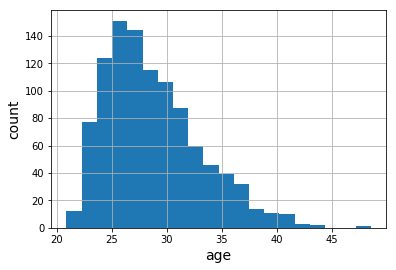

In [17]:
_=df['Age'].hist(bins=20)
plt.xlabel('age',fontsize=14)
plt.ylabel('count',fontsize=14)

In [12]:
import seaborn
seaborn.__version__

'0.9.0'

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


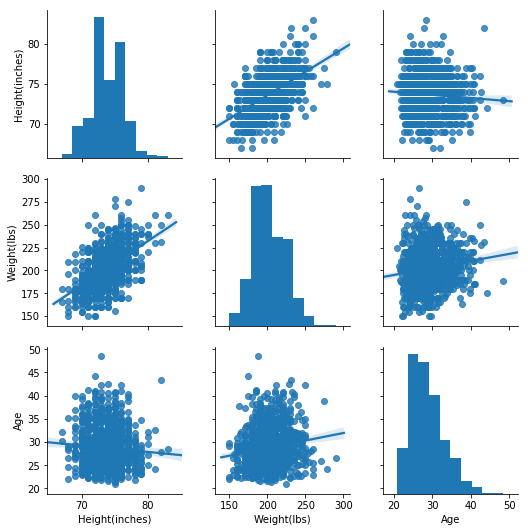

In [15]:
seaborn.pairplot(df.dropna(), kind="reg")
plt.show()